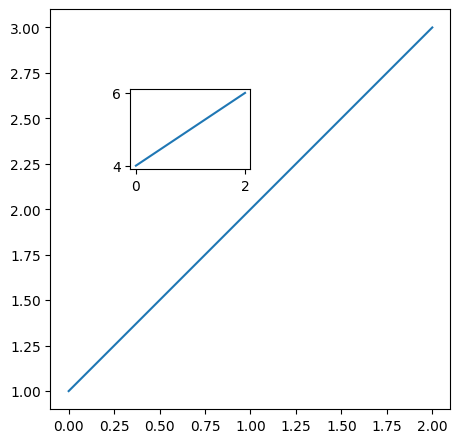

In [3]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(4, 4))
ax1 = fig.add_subplot(111, position=[0.0, 0.0, 1.0, 1.0])  # left, bottom, width, height
ax2 = fig.add_subplot(111, position=[0.2, 0.6, 0.3, 0.2])  # smaller inset axes

ax1.plot([1, 2, 3])
ax2.plot([4, 5, 6])

plt.show()

AttributeError: 'list' object has no attribute 'n_cols'

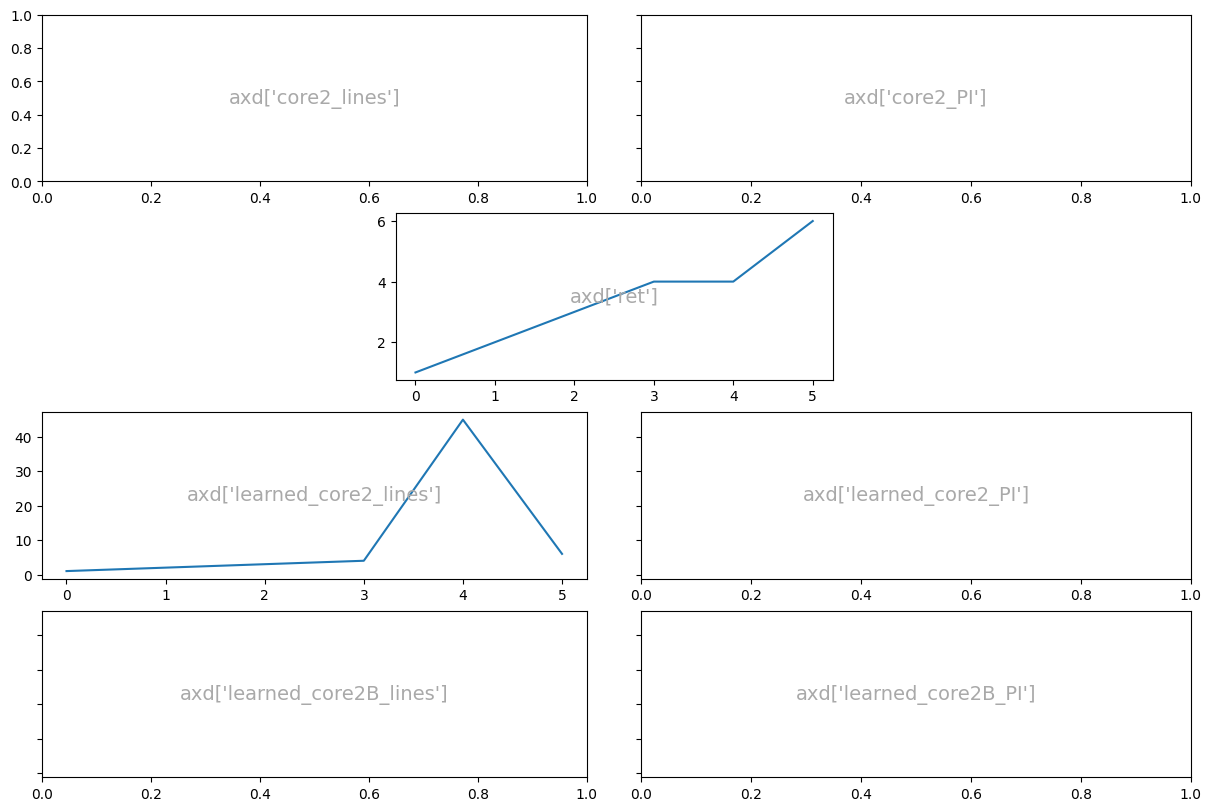

In [64]:
import matplotlib.pyplot as plt

def annotate_axes(ax, text, fontsize=18):
    ax.text(
        0.5,
        0.5,
        text,
        transform=ax.transAxes,
        ha="center",
        va="center",
        fontsize=fontsize,
        color="darkgrey",
    )

gs_kw = dict(width_ratios=[1.5, 1, 1, 1.5])
mosaic = [
    ["core2_lines", "core2_lines", "core2_PI", "core2_PI"],
    [".", "ret", "ret", "."],
    ["learned_core2_lines", "learned_core2_lines", "learned_core2_PI", "learned_core2_PI"],
    ["learned_core2B_lines", "learned_core2B_lines", "learned_core2B_PI", "learned_core2B_PI"],
]

fig, axd = plt.subplot_mosaic(
    mosaic,
    gridspec_kw=gs_kw,
    figsize=(12, 8),
    layout="constrained",
)

axd["ret"].plot([1, 2, 3, 4, 4, 6])
axd["learned_core2_lines"].plot([1, 2, 3, 4, 45, 6])

# Share y-axis within each row and hide unnecessary labels
row_spans = {}
for k in axd:
    row = k.split("_")[0] if "_" in k else k  # Determine row based on key
    if row not in row_spans:
        row_spans[row] = []
    row_spans[row].append(k)

for row, cols in row_spans.items():
    if "." not in row: # Skip rows with placeholders
        first_ax = axd[cols[0]]  # first axes in row
        for other_ax_name in cols[1:]:  # iterate other axes in row
            if other_ax_name in axd:  # Check if the ax actually exists
                axd[other_ax_name].sharey(first_ax)
                axd[other_ax_name].yaxis.set_tick_params(labelleft=False)  # Hide y labels
                # plt.setp(axd[other_ax_name].get_yticklabels(), visible=False)  # Hide tick labels for subsequent axes
                # axd[other_ax_name].tick_params(left=False)   # Hide ticks for subsequent axes


for k, ax in axd.items():
    annotate_axes(ax, f"axd[{k!r}]", fontsize=14)

plt.show()

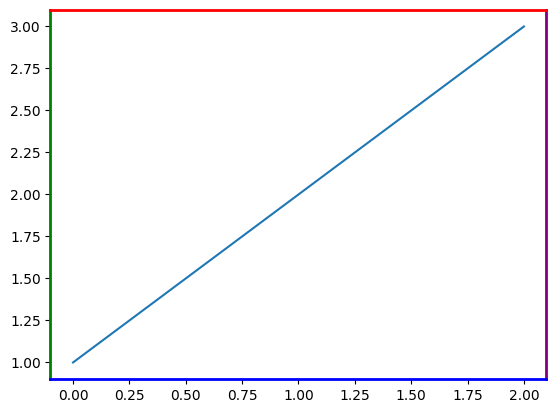

In [4]:
from matplotlib.patches import FancyArrow

arrow_props = dict(width=0.05, head_width=0.4, head_length=0.4, color="black")

# Arrow from ax1 to ax2
fig.patches.append(
    FancyArrow(0.5, 0.9, 0, -0.1, transform=fig.transFigure, **arrow_props)
)

# Arrow from ax2 to ax3
fig.patches.append(
    FancyArrow(0.5, 0.65, 0, -0.2, transform=fig.transFigure, **arrow_props)
)

# Arrow from ax3 to ax4|ax5|ax6 row
fig.patches.append(
    FancyArrow(0.5, 0.4, 0, -0.2, transform=fig.transFigure, **arrow_props)
)
